In [ ]:
!kaggle datasets download -d harlfoxem/housesalesprediction
!unzip housesalesprediction.zip

Dataset URL: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
License(s): CC0-1.0
  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 26.8MB/s]
Archive:  housesalesprediction.zip
  inflating: kc_house_data.csv       


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.drop(['id', 'zipcode', 'lat', 'long', 'date'], axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


In [ ]:
df.duplicated().sum()

6

In [ ]:
df[df.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,1070,928
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,2290,7984
20054,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,1880,3078
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,1510,1352
21474,359800.0,5,2.50,2170,2752,2.0,0,0,3,8,2170,0,2014,0,1800,2752


In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.401067e+05,3.370852,2.114720,2079.954783,1.511019e+04,1.494122,0.007544,0.234230,3.409497,7.656639,1788.397186,291.557597,1970.997917,84.334058,1986.591799,12770.571991
std,3.671710e+05,0.930058,0.770252,918.526856,4.142579e+04,0.539912,0.086529,0.766185,0.650791,1.175508,828.156250,442.618358,29.370686,401.525908,685.436161,27307.553760
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


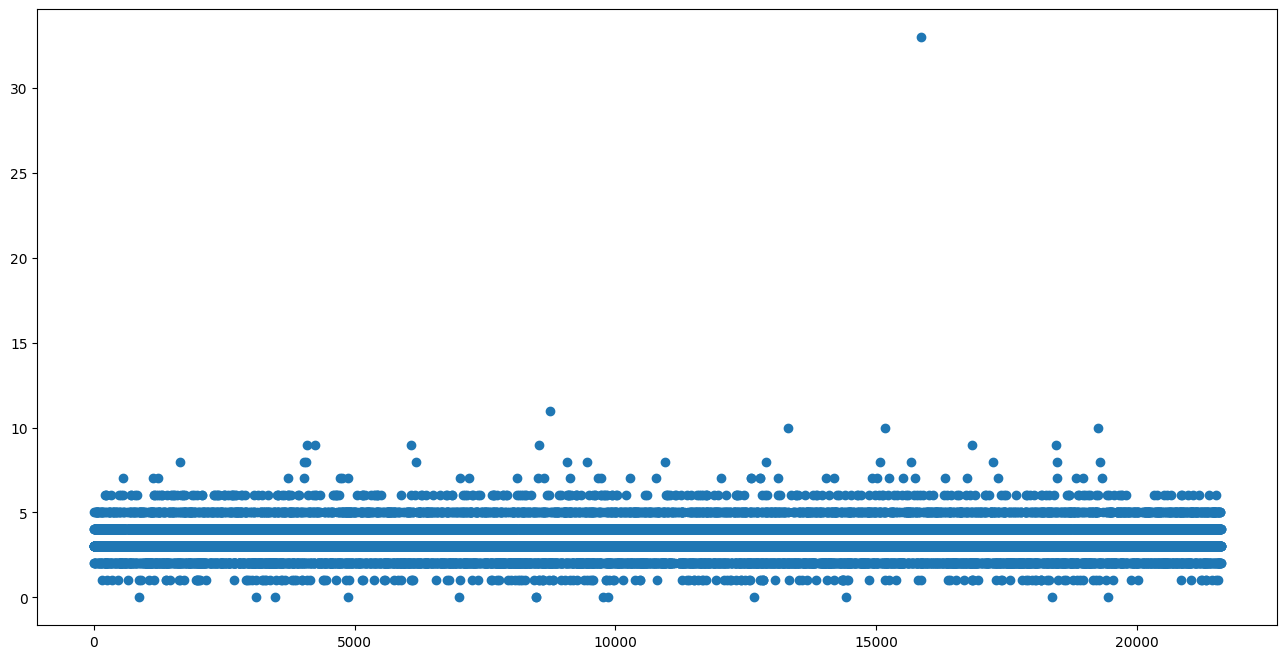

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(df.index, df.bedrooms)
plt.show()

In [ ]:
df = df[df.bedrooms < 30]

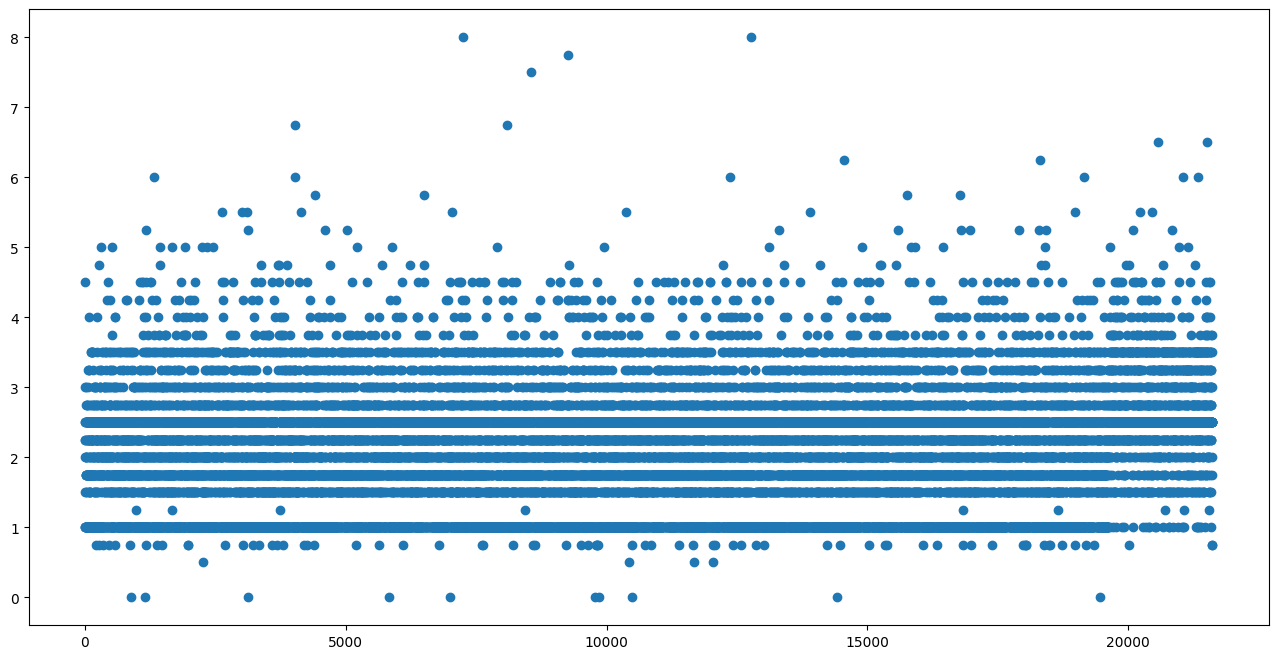

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(df.index, df.bathrooms)
plt.show()

<Axes: >

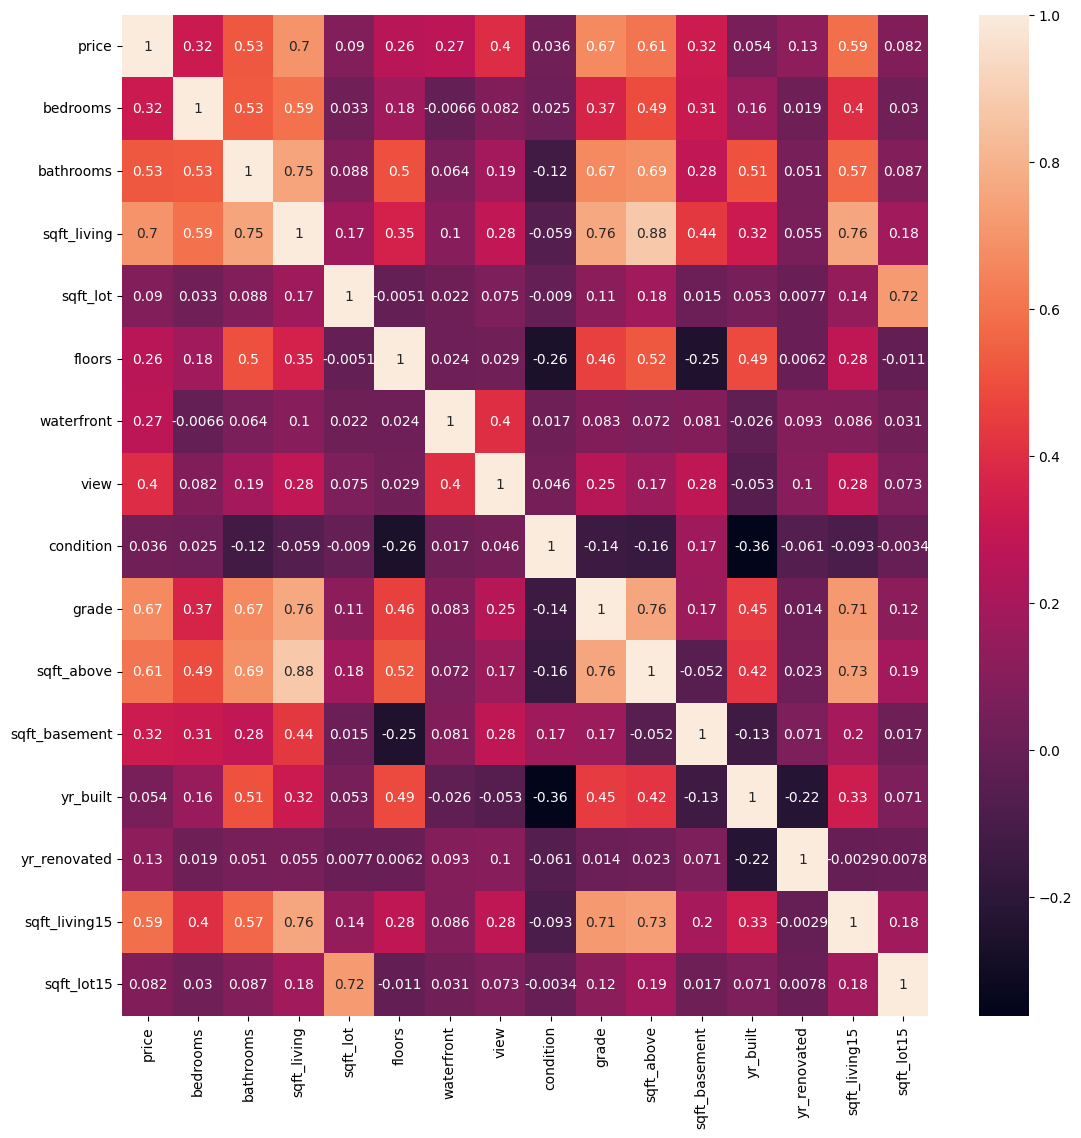

In [ ]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(), annot=True)

In [ ]:
x = df.drop(['price', 'yr_renovated'], axis=1)
y = df.price
X_test, X_train, y_test, y_train = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
print('Cross val score:', cross_val_score(model, x, y))

Mean Absolute Error: 137674.18115521554
Mean Squared Error: 47643713802.096306
R2 score: 0.6547025340584287
Cross val score: [0.65643276 0.65102292 0.64300703 0.66224507 0.62613728]


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
std = StandardScaler()
x = df.drop(['price', 'yr_renovated'], axis=1)
x = std.fit_transform(x)
y = df.price
X_test, X_train, y_test, y_train = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
print('Cross val score:', cross_val_score(model, x, y))

Mean Absolute Error: 138646.84752217433
Mean Squared Error: 46744390221.589935
R2 score: 0.6533223346290353
Cross val score: [0.65643276 0.65102292 0.64300703 0.66224507 0.62613728]


In [ ]:
x = df.drop(['price', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis=1)
y = df.price
X_test, X_train, y_test, y_train = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
print('Cross val score:', cross_val_score(model, x, y))

Mean Absolute Error: 142485.62948645535
Mean Squared Error: 44683289579.72833
R2 score: 0.6363419137818891
Cross val score: [0.6546141  0.64951721 0.64022089 0.65979363 0.63456677]


In [ ]:
x = df.drop(['price'], axis=1)
y = df.price
X_test, X_train, y_test, y_train = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
print('Cross val score:', cross_val_score(model, x, y))

Mean Absolute Error: 138737.52730630894
Mean Squared Error: 45910940286.22994
R2 score: 0.6585344257828007
Cross val score: [0.65650695 0.65096375 0.64334396 0.66247407 0.6259585 ]


In [ ]:
x = df[['sqft_living', 'bedrooms', 'bathrooms']]
y = df.price
X_test, X_train, y_test, y_train = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
print('Cross val score:', cross_val_score(model, x, y))

Mean Absolute Error: 170971.58394502898
Mean Squared Error: 66418141406.482895
R2 score: 0.5054296654837622
Cross val score: [0.5096347  0.51053233 0.49046735 0.50760717 0.51256243]
